<a href="https://colab.research.google.com/github/AhmedEsmail91/NLP/blob/main/Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
import numpy as np
dataset=pd.read_csv('Sentiment_Analysis.csv')
dataset=dataset.iloc[:,-2:]
sentences=dataset['text'].tolist()
labels=dataset['sentiment'].tolist()
trainig_size=int(0.8*len(labels))

# Trainig Dataset
training_sentences=sentences[:trainig_size]
training_labels=labels[:trainig_size]
# Testing Dataset
testing_sentences=sentences[trainig_size:]
testing_labels=labels[trainig_size:]

training_labels_np=np.array(training_labels)
testing_labels_np=np.array(testing_labels)

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)

padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type, truncating=trunc_type)
num=5
for i in range(num):
    print(f'Example {i+1}:\n')
    print('Original:',training_sentences[i])
    print('Seq     :',sequences[i])
    print('Padded  :',[x if x!=0 else '?' for x in padded[i]])
    if i!=num-1:
        print('##################################################')

Example 1:

Original: So there is no way for me to plug it in here in the US unless I go by a converter.
Seq     : [26, 68, 7, 63, 173, 13, 67, 8, 218, 5, 16, 82, 16, 2, 197, 363, 4, 75, 109, 6, 1]
Padded  : [26, 68, 7, 63, 173, 13, 67, 8, 218, 5, 16, 82, 16, 2, 197, 363, 4, 75, 109, 6, 1, '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']
##################################################
Example 2:

Original: Good case Excellent value.
Seq     : [20, 90, 76, 364]
Padded  : [20, 90, 76, 364, '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
import tensorflow as tf
# tf.keras.layers.Embedding(
#     input_dim,
#     output_dim,
#     embeddings_initializer='uniform',
#     embeddings_regularizer=None,
#     activity_regularizer=None,
#     embeddings_constraint=None,
#     mask_zero=False,
#     input_length=None,
#     sparse=False,
#     **kwargs
# )
from tensorflow.keras.layers import Embedding
model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 6)                 9606      
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25613 (100.05 KB)
Trainable params: 25613 (100.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 6)                 9606      
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25613 (100.05 KB)
Trainable params: 25613 (100.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs=10
model.fit(padded,training_labels_np,epochs=num_epochs,validation_data=(testing_padded,testing_labels_np),validation_batch_size=20)

Epoch 1/10
50/50 [==============================] - 5s 72ms/step - loss: 0.6938 - accuracy: 0.4953 - val_loss: 0.6991 - val_accuracy: 0.4110
Epoch 2/10
50/50 [==============================] - 2s 36ms/step - loss: 0.6916 - accuracy: 0.5229 - val_loss: 0.7011 - val_accuracy: 0.4110
Epoch 3/10
50/50 [==============================] - 1s 23ms/step - loss: 0.6895 - accuracy: 0.5229 - val_loss: 0.6994 - val_accuracy: 0.4110
Epoch 4/10
50/50 [==============================] - 1s 18ms/step - loss: 0.6813 - accuracy: 0.5700 - val_loss: 0.6650 - val_accuracy: 0.7243
Epoch 5/10
50/50 [==============================] - 1s 14ms/step - loss: 0.6118 - accuracy: 0.8060 - val_loss: 0.6202 - val_accuracy: 0.6967
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.4872 - accuracy: 0.8544 - val_loss: 0.5691 - val_accuracy: 0.7193
Epoch 7/10
50/50 [==============================] - 1s 11ms/step - loss: 0.3573 - accuracy: 0.9065 - val_loss: 0.5133 - val_accuracy: 0.7594
Epoch 8/10
50/

In [ ]:
output=list(model.history.history.keys())

In [ ]:
avg_output={}
for key in output:
  avg_output[key]=np.mean(model.history.history.get(key)[:])

In [ ]:
avg_output

{'loss': 0.4851040780544281,
 'accuracy': 0.7529190123081207,
 'val_loss': 0.5938356161117554,
 'val_accuracy': 0.6423558980226517}

In [ ]:
e=model.layers[0]
weights=e.get_weights()[0]
print(weights)

[[ 0.03367389  0.03417534 -0.03537016 ...  0.0025322  -0.03173821
  -0.06345926]
 [ 0.05987522 -0.09791356 -0.04487206 ...  0.00732887 -0.06698004
   0.01127045]
 [-0.03638112 -0.08700375 -0.04004287 ...  0.04376299  0.02148033
  -0.02756465]
 ...
 [-0.04947188 -0.18555486 -0.12010252 ... -0.12458803 -0.01111126
   0.13225792]
 [ 0.11780852 -0.10734049 -0.11217313 ... -0.06300142  0.15938406
   0.12943822]
 [ 0.07338461 -0.00648812 -0.00561951 ... -0.05595025 -0.08599064
   0.09874658]]


In [ ]:
# write out the embedding vectors and metadata
import io
out_v=io.open('vecs.tsv','w',encoding='utf-8')
out_m=io.open('meta.tsv','w',encoding='utf-8')
for word_num in range(1,vocab_size):
  word=reverse_word_index[word_num]
  embedding=weights[word_num] # saving the weighs for each word
  out_m.write(word+'\n')
  out_v.write('\t'.join([str(x) for x in embedding])+'\n')

# # reverse_word_index[499]
# weights[499]
out_m.close()
out_v.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Use the model to predict a review
fake_reviews = ['I love this phone', 'I hate spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'Everything was green',
                'the host seated us immediately',
                'they gave us free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head']

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 [==============================] - 0s 73ms/step
I love this phone
[0.98756325]


I hate spaghetti
[0.09426564]


Everything was cold
[0.397597]


Everything was hot exactly as I wanted
[0.609927]


Everything was green
[0.572009]


the host seated us immediately
[0.72292864]


they gave us free chocolate cake
[0.9088939]


not sure about the wilted flowers on the table
[0.03849566]


only works when I stand on tippy toes
[0.8926135]


does not work when I stand on my head
[0.00336158]




# **`Lets Tweeking The Model`**
✈


In [ ]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_6 (Dense)             (None, 6)                 102       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8109 (31.68 KB)
Trainable params: 8109 (31.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels_np, epochs=num_epochs, validation_data=(testing_padded, testing_labels_np))

Epoch 1/30
50/50 [==============================] - 7s 129ms/step - loss: 0.6921 - accuracy: 0.5217 - val_loss: 0.6988 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 2s 37ms/step - loss: 0.6898 - accuracy: 0.5223 - val_loss: 0.7002 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 1s 26ms/step - loss: 0.6872 - accuracy: 0.5223 - val_loss: 0.6996 - val_accuracy: 0.4110
Epoch 4/30
50/50 [==============================] - 1s 20ms/step - loss: 0.6820 - accuracy: 0.5223 - val_loss: 0.6987 - val_accuracy: 0.4110
Epoch 5/30
50/50 [==============================] - 1s 20ms/step - loss: 0.6742 - accuracy: 0.5487 - val_loss: 0.6884 - val_accuracy: 0.4812
Epoch 6/30
50/50 [==============================] - 1s 11ms/step - loss: 0.6643 - accuracy: 0.5807 - val_loss: 0.6848 - val_accuracy: 0.4887
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.5957 - val_loss: 0.6750 - val_accuracy: 0.5338
Epoch 8/30
50

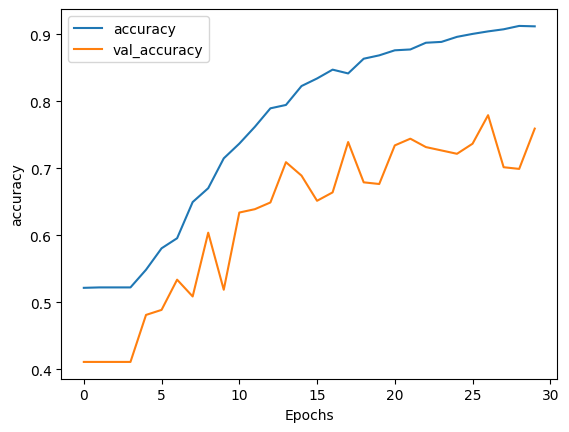

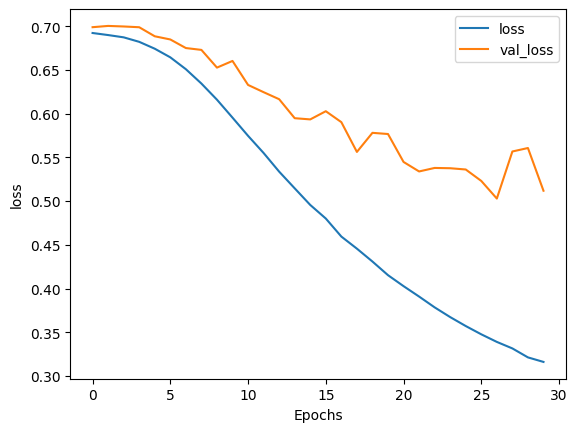

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [ ]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Use the model to predict a review
fake_reviews = ['I love this phone', 'I hate spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'Everything was green',
                'the host seated us immediately',
                'they gave us free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head']

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 [==============================] - 0s 51ms/step
I love this phone
[0.94054943]


I hate spaghetti
[0.27959904]


Everything was cold
[0.5673119]


Everything was hot exactly as I wanted
[0.32277855]


Everything was green
[0.5673119]


the host seated us immediately
[0.6000507]


they gave us free chocolate cake
[0.8687534]


not sure about the wilted flowers on the table
[0.27959904]


only works when I stand on tippy toes
[0.9105394]


does not work when I stand on my head
[0.27959904]


